In [24]:
#load libraries
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [25]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [26]:
#load dataset from keras name-fashion_mnist
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

In [27]:
xtrain.shape

(60000, 28, 28)

In [28]:
xtest.shape

(10000, 28, 28)

In [29]:
xtrain[0]#gray scale image -0 represent-white and 255 -black and in between light dark

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [30]:
ytrain[0]

9

In [31]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

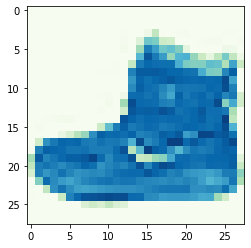

In [32]:
plt.imshow(xtrain[0],cmap='GnBu')

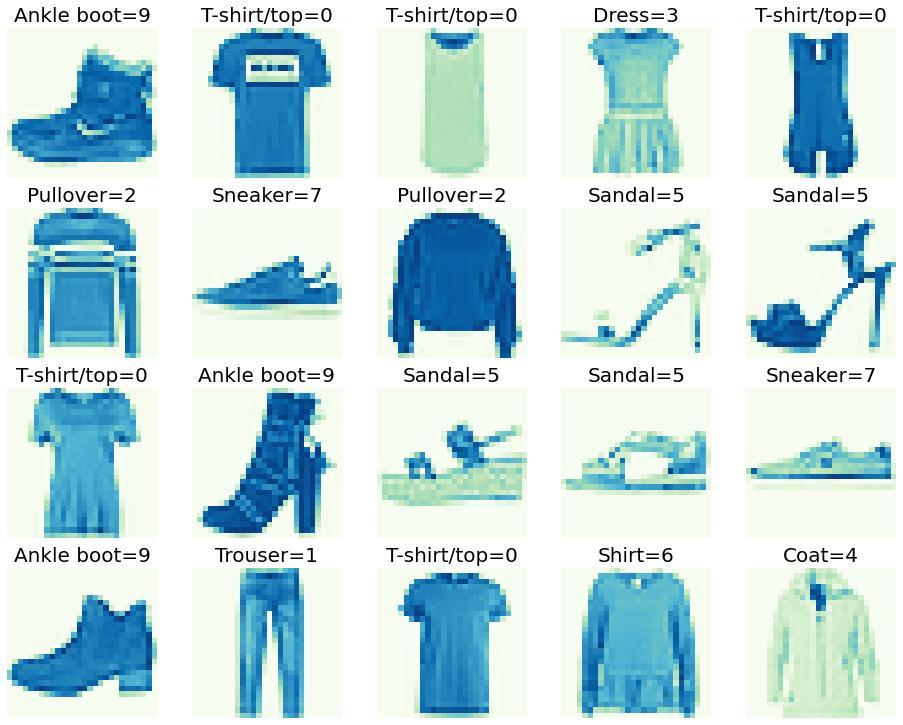

In [33]:
plt.figure(figsize=(16,16))
for i in range(20):
    plt.subplot(5,5,i+1) #5X5 matrix and position the image
    plt.imshow(xtrain[i],cmap='GnBu')
    plt.axis('off')
    plt.title(class_labels[ytrain[i]]+"="+str(ytrain[i]),fontsize=20) #put the class label list and imge name pick by index

In [34]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
xtrain = np.expand_dims(xtrain, -1)
xtest = np.expand_dims(xtest, -1)

In [35]:
#feature scaling
xtrain=xtrain/255
xtest=xtest/255

In [36]:
xtrain,val_xtrain,ytrain,val_ytrain=train_test_split(xtrain,ytrain,test_size=0.25,random_state=0)

In [37]:
xtrain.shape,val_xtrain.shape

((45000, 28, 28, 1), (15000, 28, 28, 1))

In [38]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax'),
    
    
    
    
])

In [39]:
#build NN
#model=keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),\
#                               keras.layers.Dense(units=32,activation='relu'),\
#                               keras.layers.Dense(units=28,activation='relu'),\
#                               keras.layers.Dense(units=10,activation='softmax')])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
history=model.fit(xtrain,ytrain,epochs=10,batch_size=32,verbose=1,validation_data=(val_xtrain,val_ytrain))

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 153us/step - loss: 0.1444 - accuracy: 0.9466 - val_loss: 0.2626 - val_accuracy: 0.9099
Epoch 2/10
45000/45000 [==============================] - 7s 154us/step - loss: 0.1214 - accuracy: 0.9561 - val_loss: 0.2839 - val_accuracy: 0.9099
Epoch 3/10
45000/45000 [==============================] - 7s 159us/step - loss: 0.1033 - accuracy: 0.9621 - val_loss: 0.2914 - val_accuracy: 0.9127
Epoch 4/10
45000/45000 [==============================] - 7s 155us/step - loss: 0.0870 - accuracy: 0.9685 - val_loss: 0.2996 - val_accuracy: 0.9121
Epoch 5/10
45000/45000 [==============================] - 9s 197us/step - loss: 0.0732 - accuracy: 0.9734 - val_loss: 0.3221 - val_accuracy: 0.9097
Epoch 6/10
45000/45000 [==============================] - 7s 161us/step - loss: 0.0614 - accuracy: 0.9779 - val_loss: 0.3373 - val_accuracy: 0.9137
Epoch 7/10
45000/45000 [==============================] - 7s 1

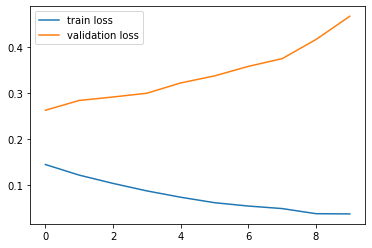

<Figure size 432x288 with 0 Axes>

In [44]:
#plot the loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.jpg')

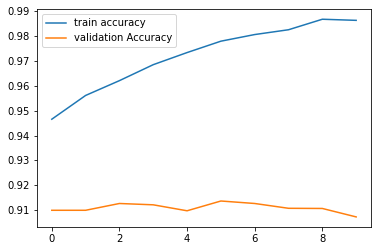

<Figure size 432x288 with 0 Axes>

In [45]:
#plot the loss
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation Accuracy')
plt.legend()
plt.show()
plt.savefig('ACC_ValAccuracy.jpg')

In [46]:
model.evaluate(xtest,ytest)[1]#score value

10000/10000 [==============================] - 1s 57us/step


0.9049000144004822

In [47]:
#prediction
ypred=model.predict(xtest)

In [48]:
ypred[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [49]:
np.argmax(ypred[0].round(2))

9

In [50]:
ytest[0]

9

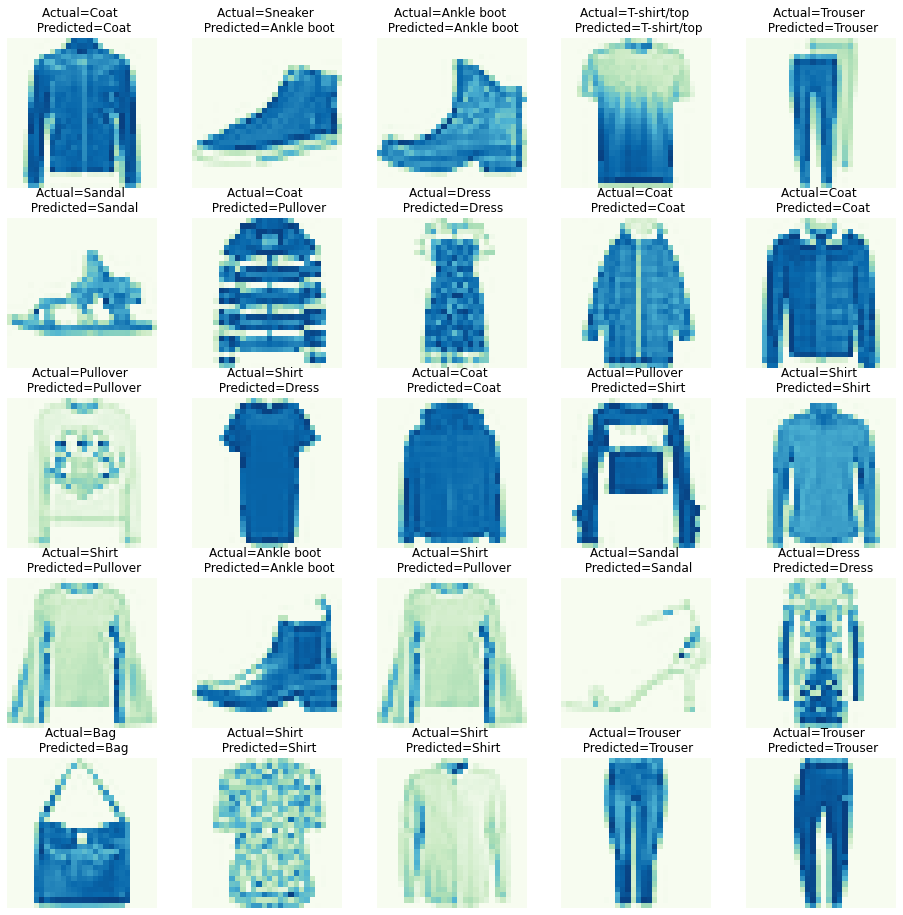

In [56]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1 #5X5 matrix and position the image
    plt.imshow(xtest[i].reshape(28,28),cmap='GnBu')
    plt.axis('off')
    plt.title('Actual={} \n Predicted={}'.format(class_labels[ytest[i]],class_labels[np.argmax(ypred[i])]))

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
cm=confusion_matrix(ytest,[np.argmax(i) for i in ypred])

In [59]:
cm

array([[856,   0,  11,  12,   5,   0, 115,   0,   1,   0],
       [  0, 979,   1,  11,   4,   0,   5,   0,   0,   0],
       [ 19,   0, 848,  10,  51,   0,  72,   0,   0,   0],
       [ 20,   7,   5, 889,  29,   0,  49,   0,   1,   0],
       [  1,   1,  69,  16, 871,   0,  42,   0,   0,   0],
       [  3,   0,   0,   0,   0, 965,   2,  13,   1,  16],
       [ 93,   0,  38,  15,  59,   0, 795,   0,   0,   0],
       [  0,   0,   0,   0,   0,  12,   0, 941,   1,  46],
       [ 10,   2,   2,  11,   5,   1,  40,   3, 926,   0],
       [  1,   0,   0,   0,   0,   2,   2,  16,   0, 979]], dtype=int64)

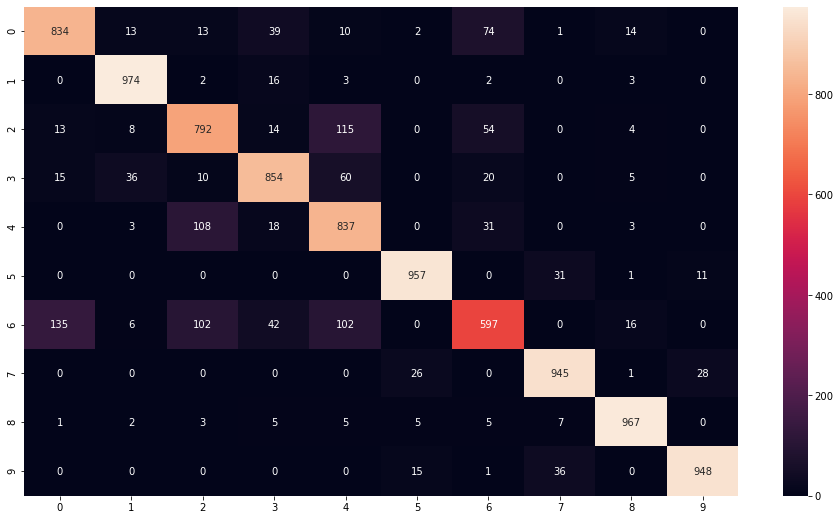

In [46]:
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt='d')

In [60]:
cr=classification_report(ytest,[np.argmax(i) for i in ypred],target_names=class_labels,)

In [61]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.92      0.89      0.91      1000
        Coat       0.85      0.87      0.86      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.80      0.75      1000
     Sneaker       0.97      0.94      0.95      1000
         Bag       1.00      0.93      0.96      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.90      0.91     10000



In [62]:
model.save('mnistfashion_cnn_classifier.h5')